# Bland-Altman plots in practice
In this notebook we demonstrate some simulated scenarios introducing certain errors and how you can see them in Bland-Altman plots.

In [1]:
import numpy as np
from utils import bland_altman_plot

For determining variability of extracted features between different segmentation algorithms and potential systematic bias, we use [Bland-Altman Plots](https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot). For demonstration purposes, we use synthetic nuclei volume measurements from 100 images.

In [2]:
mean = 250
std = 50
number_of_samples = 100

volume_ground_truth = np.random.normal(loc=250, scale=25, size=number_of_samples)
volume_ground_truth[:5]

array([204.09881421, 262.64320502, 247.56230711, 256.07006239,
       282.41305845])

We now introduce a function `vary` that turns ground truth into a measurement including some random variation and systematic bias.

In [3]:
def vary(values, relative_error, absolute_error, std):
    new_value = values * (1.0 + relative_error) + np.random.normal(loc=absolute_error, scale=std, size=values.shape)
    return new_value

volume_test = vary(volume_ground_truth, relative_error=0.0, absolute_error=10, std=5)
volume_test[:5]

array([209.85951204, 267.53394119, 260.76895678, 273.23663888,
       295.41294457])

From a Bland-Altman plot, you can read the average difference between two methods, e.g. in the following plot, you can see that the mean difference is zero. Thus, both methods deliver similar results on average.

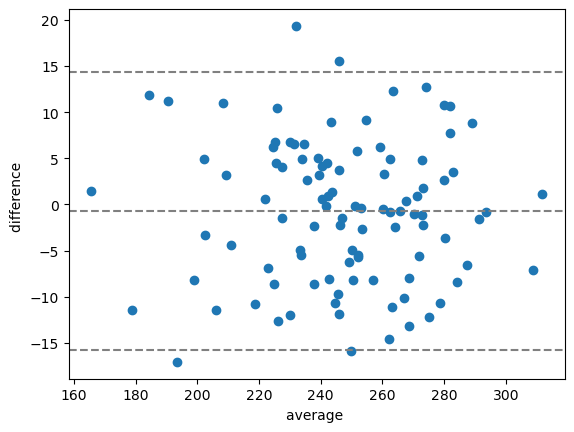

In [4]:
volume1 = vary(volume_ground_truth, relative_error=0.0, absolute_error=0, std=5)
volume2 = vary(volume_ground_truth, relative_error=0.0, absolute_error=0, std=5)

bland_altman_plot(volume1, volume2)

In the next plot you see that the difference center line is at about 10, as specified as absolute error when generating the synthetic data.

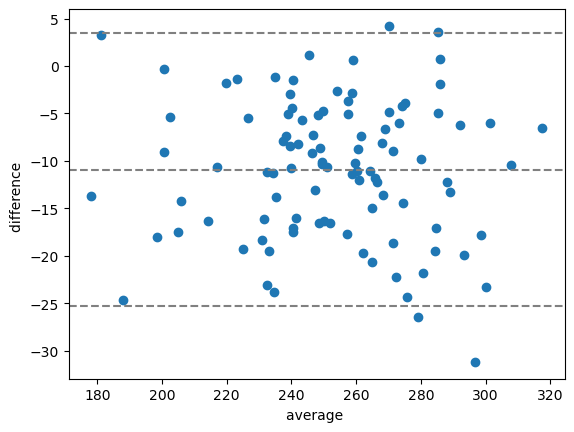

In [5]:
volume1 = vary(volume_ground_truth, relative_error=0.0, absolute_error=0, std=5)
volume2 = vary(volume_ground_truth, relative_error=0.0, absolute_error=10, std=5)

bland_altman_plot(volume1, volume2)

You can also see if there is a relative bias, e.g. the one method overestimates volume of objects depending on the volume of the objects. Such a relative error is expressed as a tilt in the measurments in a Bland-Altman plot.

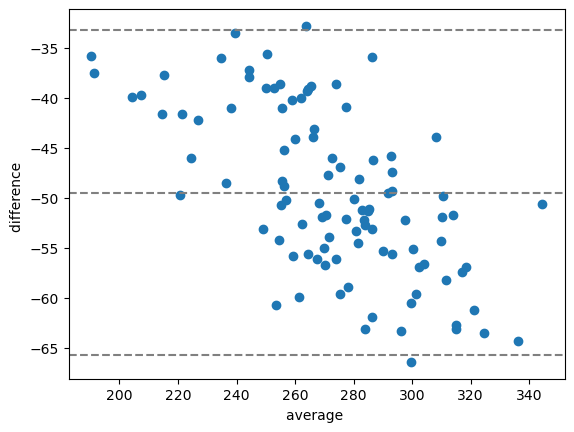

In [6]:
volume1 = vary(volume_ground_truth, relative_error=0.0, absolute_error=0, std=5)
volume2 = vary(volume_ground_truth, relative_error=0.2, absolute_error=0, std=5)

bland_altman_plot(volume1, volume2)